In [10]:
# wczytanie danych oraz bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_comp=pd.read_csv('pogoda2_pv.csv')
df_comp

,timestamp,data,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current
0,21-05-2021T16:21:01,21-05-2021T16:21,21.244,3.894,322,33.985,985.535,34382.801,198.0,10.22,1.7,73.77,2.4,47.73,3.6
1,21-05-2021T16:22:01,21-05-2021T16:22,21.188,2.121,269,33.986,985.603,34601.801,199.2,10.29,1.0,79.49,2.2,47.73,3.6
2,21-05-2021T16:23:01,21-05-2021T16:23,21.160,6.357,262,33.801,985.447,35530.898,204.6,10.57,1.0,79.03,2.3,50.65,3.5
3,21-05-2021T16:24:01,21-05-2021T16:24,21.045,2.433,292,34.229,985.547,36529.301,210.3,10.93,1.0,76.62,2.5,51.13,3.7
4,21-05-2021T16:25:02,21-05-2021T16:25,21.070,1.773,140,34.945,985.585,38342.199,220.9,11.46,0.6,74.97,2.6,51.47,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132461,09-09-2021T13:59:01,09-09-2021T13:59,26.886,1.368,198,35.233,994.439,75351.203,433.9,21.30,6.0,75.99,0.4,54.72,0.5
132462,09-09-2021T14:00:02,09-09-2021T14:00,26.960,1.382,194,33.530,994.427,75324.102,433.8,21.33,5.8,76.14,0.4,54.70,0.5
132463,09-09-2021T14:01:01,09-09-2021T14:01,27.017,1.787,203,33.237,994.394,75073.102,432.3,21.26,10.0,75.98,0.4,54.72,0.5
132464,09-09-2021T14:02:01,09-09-2021T14:02,27.151,2.998,140,33.558,994.423,74817.203,430.9,21.26,9.1,75.79,0.4,54.72,0.5


In [11]:
#porządkowanie danych
df_comp['Power'] = df_comp['pv_voltage'] * df_comp['pv_current'] 
df_comp.drop(['pv_voltage','pv_current', 'battery_voltage', 'battery_current','timestamp','uv_radiation'], axis = 1, inplace = True)
df_comp.drop(df_comp.index[54770:132466], axis=0, inplace=True)
df_comp.drop(df_comp.index[0:39], axis=0, inplace=True)
df_comp

,data,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,pm2.5,Power
39,21-05-2021T17:00,21.221,2.209,223,35.609,985.383,25911.400,149.2,0.0,117.315
40,21-05-2021T17:01,21.215,3.897,278,35.150,985.250,25763.699,148.3,1.0,119.205
41,21-05-2021T17:02,21.127,0.552,294,36.539,985.338,25906.100,149.2,1.0,119.880
42,21-05-2021T17:03,21.123,2.985,264,35.392,985.314,26120.600,150.4,0.1,120.255
43,21-05-2021T17:04,21.127,0.860,232,35.721,985.286,26603.100,153.2,1.0,126.320
...,...,...,...,...,...,...,...,...,...,...
54765,29-06-2021T09:56,26.966,3.646,96,48.712,989.069,95507.102,550.0,17.3,258.950
54766,29-06-2021T09:57,26.746,5.106,144,49.923,989.003,95294.297,548.8,19.0,251.328
54767,29-06-2021T09:58,26.671,2.108,102,49.484,989.026,95289.703,548.8,18.2,258.600
54768,29-06-2021T09:59,26.657,2.644,116,49.388,989.046,96548.500,556.0,13.1,261.513


In [12]:
# formatowanie datetime, frequency oraz resampling
df_comp.data=pd.to_datetime(df_comp.data, dayfirst=True)
df_comp.set_index('data', inplace=True)
df_compfreq = df_comp.asfreq('T', method = 'ffill')
df_compresample = df_compfreq.resample('30T').agg({'temperature': np.mean, 'wind_speed': np.mean,'wind_dir': np.mean,'humidity': np.mean,'air_pressure': np.mean,'luminance': np.mean,'solar_radiation': np.mean,'pm2.5': np.mean,'Power': np.sum,})
df_compresample

,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,pm2.5,Power
data,,,,,,,,,
2021-05-21 17:00:00,20.924100,2.152600,255.633333,35.809500,985.177133,25516.760033,146.913333,0.796667,3752.814
2021-05-21 17:30:00,20.736067,2.061000,262.266667,34.751367,984.993633,26192.696600,150.816667,0.603333,4032.787
2021-05-21 18:00:00,20.613833,2.491133,264.966667,36.278433,984.815867,21656.760033,124.676667,0.883333,3371.946
2021-05-21 18:30:00,20.452467,2.370167,242.000000,36.869267,984.785033,18887.399900,108.743333,0.843333,2965.362
2021-05-21 19:00:00,19.713467,2.099167,266.033333,38.911467,984.792967,11829.410000,68.076667,1.006667,1151.940
...,...,...,...,...,...,...,...,...,...
2021-06-29 08:00:00,24.398000,1.407200,117.033333,60.594900,989.497333,56445.996767,325.053333,36.756667,3350.734
2021-06-29 08:30:00,25.091500,1.860167,97.533333,58.063367,989.428067,70859.649900,408.096667,31.130000,5187.734
2021-06-29 09:00:00,26.177933,1.939567,97.633333,53.799567,989.227600,76673.250333,441.883333,25.593333,5886.454


In [13]:
df_compresample.info()
df_compresample.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1859 entries, 2021-05-21 17:00:00 to 2021-06-29 10:00:00
Freq: 30T
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      1859 non-null   float64
 1   wind_speed       1859 non-null   float64
 2   wind_dir         1859 non-null   float64
 3   humidity         1859 non-null   float64
 4   air_pressure     1859 non-null   float64
 5   luminance        1859 non-null   float64
 6   solar_radiation  1859 non-null   float64
 7   pm2.5            1859 non-null   float64
 8   Power            1859 non-null   float64
dtypes: float64(9)
memory usage: 145.2 KB


,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,pm2.5,Power
data,,,,,,,,,
2021-05-21 17:00:00,20.924100,2.152600,255.633333,35.809500,985.177133,25516.760033,146.913333,0.796667,3752.814
2021-05-21 17:30:00,20.736067,2.061000,262.266667,34.751367,984.993633,26192.696600,150.816667,0.603333,4032.787
2021-05-21 18:00:00,20.613833,2.491133,264.966667,36.278433,984.815867,21656.760033,124.676667,0.883333,3371.946
2021-05-21 18:30:00,20.452467,2.370167,242.000000,36.869267,984.785033,18887.399900,108.743333,0.843333,2965.362
2021-05-21 19:00:00,19.713467,2.099167,266.033333,38.911467,984.792967,11829.410000,68.076667,1.006667,1151.940


In [14]:
# correlation matrix and heatmap
corr=df_compresample.corr()
corr

,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,pm2.5,Power
temperature,1.000000,0.415351,-0.439128,-0.635398,-0.211275,0.565029,0.565043,-0.125676,0.470781
wind_speed,0.415351,1.000000,-0.264285,-0.493696,-0.079060,0.463674,0.463652,-0.527218,0.418716
wind_dir,-0.439128,-0.264285,1.000000,0.293216,-0.022207,-0.182073,-0.182098,0.082141,-0.137722
humidity,-0.635398,-0.493696,0.293216,1.000000,-0.143230,-0.644195,-0.644175,0.607063,-0.620117
air_pressure,-0.211275,-0.079060,-0.022207,-0.143230,1.000000,0.096553,0.096551,0.076011,0.111447
luminance,0.565029,0.463674,-0.182073,-0.644195,0.096553,1.000000,1.000000,-0.313368,0.840753
solar_radiation,0.565043,0.463652,-0.182098,-0.644175,0.096551,1.000000,1.000000,-0.313332,0.840747
pm2.5,-0.125676,-0.527218,0.082141,0.607063,0.076011,-0.313368,-0.313332,1.000000,-0.345579
Power,0.470781,0.418716,-0.137722,-0.620117,0.111447,0.840753,0.840747,-0.345579,1.000000


<AxesSubplot:>

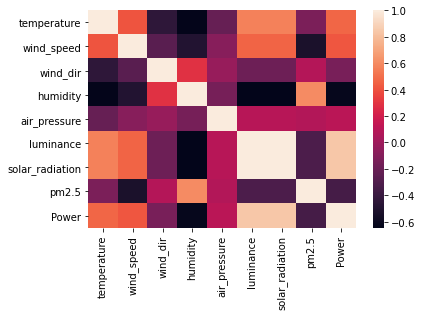

In [15]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

R2 score: 0.7095311176253163
Mean Absolute Error score: 977.9438795924165
Median Absolute Error score: 289.65942123188154
Mean Squared Error score: 2636966.442399579


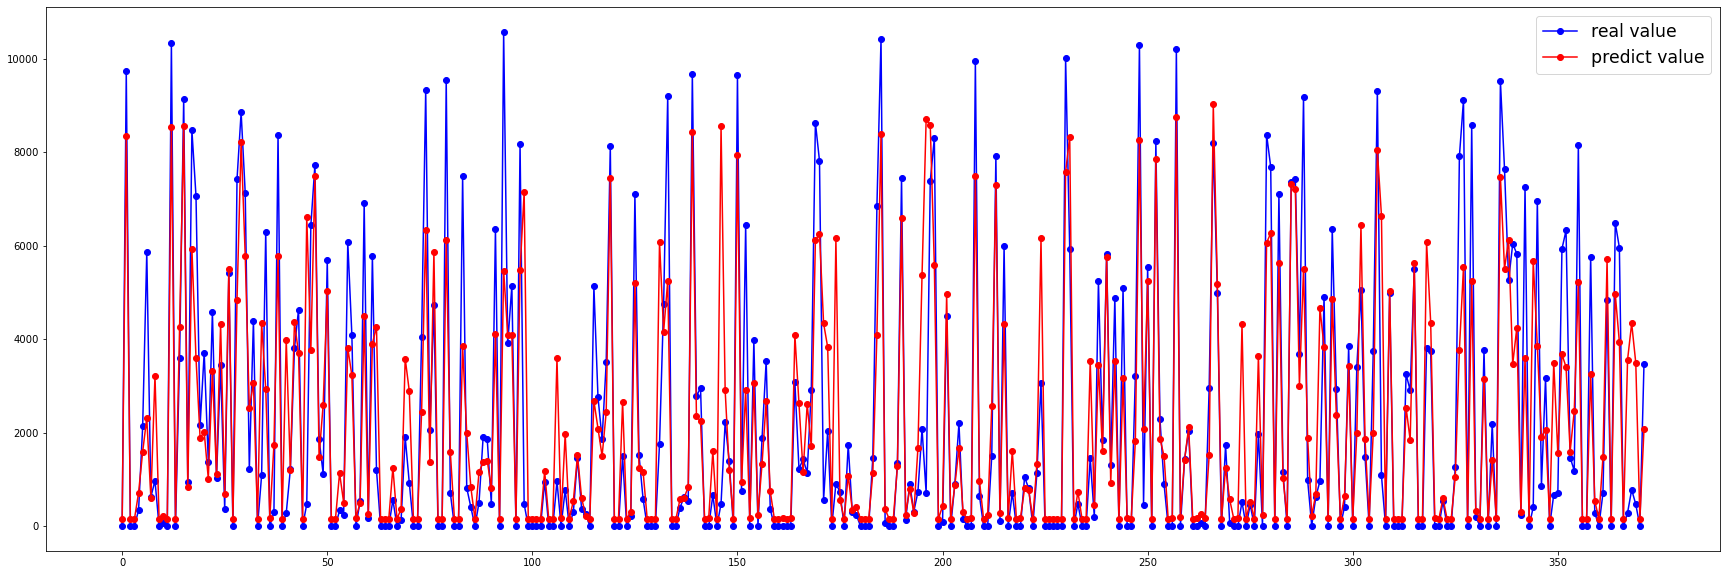

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
weather_features = ['solar_radiation','luminance']

X = df_compresample[weather_features]

Y = df_compresample.Power

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)
MAE = mean_absolute_error(Y_test, Y_pred)
MDAE = median_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)

print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
print ("Mean Absolute Error score: " + str(MAE))
print ("Median Absolute Error score: " + str(MDAE))
print ("Mean Squared Error score: " + str(MSE))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()

In [17]:
Y_test.size

372

R2 score: 0.7113741521470083
Mean Absolute Error score: 987.1079048085908
Median Absolute Error score: 386.19284344044945
Mean Squared Error score: 2620234.804414286


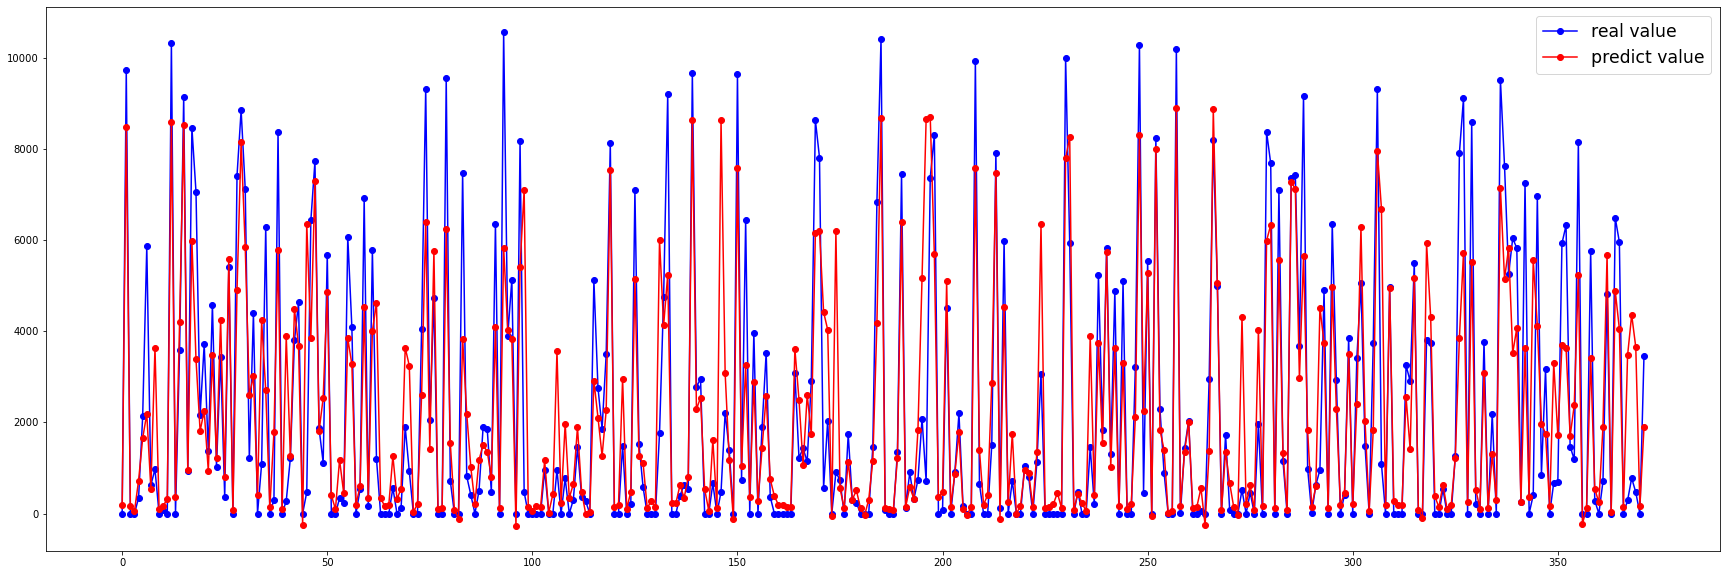

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
weather_features = ['solar_radiation', 'temperature', 'wind_speed','air_pressure','luminance']

X = df_compresample[weather_features]

Y = df_compresample.Power

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)
MAE = mean_absolute_error(Y_test, Y_pred)
MDAE = median_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)

print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
print ("Mean Absolute Error score: " + str(MAE))
print ("Median Absolute Error score: " + str(MDAE))
print ("Mean Squared Error score: " + str(MSE))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()